## Creating Model

Visualizing df_closed

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
df_closed = pd.read_parquet('df_closed.parquet')
df_closed.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,fico_range_high,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,issue_d_months,earliest_cr_line_months,last_pymnt_d_months,last_credit_pull_d_months,loan_default
0,3500.0,36 months,0.2499,E,< 1 year,RENT,30784.0,Not Verified,debt_consolidation,16.96,0.0,669.0,4.0,1.0,7849.0,0.740,36.0,w,0.0,3500.00,1237.26,0.00,0.0000,1752.66,499.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,50.0,8.0,4.0,13.0,1158.0,74.0,10650.0,2.0,4.0,6.0,13.0,596.0,907.0,79.0,0.0,0.0,160.0,127.0,7.0,7.0,0.0,7.0,2.0,1.0,7.0,14.0,17.0,11.0,13.0,25.0,13.0,14.0,NaN,0.0,0.0,4.0,69.0,85.7,1.0,0.0,16579.0,6350.0,5929.0,N,N,49,212,27.0,4.0,0
1,8000.0,36 months,0.0649,A,10+ years,MORTGAGE,65000.0,Not Verified,home_improvement,10.84,0.0,709.0,0.0,1.0,3012.0,0.354,11.0,w,0.0,4477.11,668.37,0.00,0.0000,245.16,584.0,580.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,15.0,73.0,0.0,1.0,1569.0,63.0,8500.0,2.0,0.0,1.0,3.0,14826.0,5488.0,35.4,0.0,0.0,166.0,35.0,16.0,12.0,3.0,16.0,3.0,0.0,2.0,2.0,2.0,5.0,2.0,3.0,2.0,5.0,0.0,0.0,0.0,1.0,100.0,0.0,1.0,0.0,87102.0,8500.0,23822.0,N,N,56,225,34.0,4.0,1
2,11000.0,36 months,0.0999,B,10+ years,MORTGAGE,33500.0,Source Verified,debt_consolidation,18.38,0.0,704.0,0.0,0.0,10403.0,0.443,23.0,w,0.0,11000.00,1793.23,0.00,0.0000,295.72,774.0,770.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23500.0,NaN,NaN,NaN,4.0,6554.0,4288.0,66.2,0.0,0.0,216.0,183.0,13.0,10.0,0.0,18.0,14.0,0.0,3.0,4.0,6.0,10.0,9.0,13.0,6.0,11.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,0.0,85580.0,12700.0,62080.0,N,N,58,278,21.0,4.0,0
3,25000.0,36 months,0.1699,D,1 year,RENT,70000.0,Verified,debt_consolidation,10.50,0.0,664.0,0.0,0.0,19878.0,0.663,17.0,f,0.0,1634.65,1038.95,44.56,603.8892,935.76,554.0,550.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000.0,NaN,NaN,NaN,4.0,4320.0,10122.0,66.3,0.0,0.0,116.0,170.0,10.0,10.0,0.0,10.0,10.0,0.0,3.0,8.0,14.0,1.0,9.0,16.0,3.0,10.0,0.0,0.0,0.0,1.0,88.2,42.9,0.0,0.0,51390.0,30000.0,21390.0,N,N,74,246,70.0,47.0,1
4,8800.0,36 months,0.1899,D,2 years,RENT,65000.0,Source Verified,debt_consolidation,18.24,0.0,664.0,1.0,0.0,14741.0,0.819,26.0,w,0.0,5180.89,1435.14,0.00,91.3896,322.53,504.0,500.0,0.0,0.0,0.0,2.0,12.0,2.0,6.0,6.0,115.0,3.0,3.0,4878.0,110.0,18000.0,2.0,2.0,4.0,9.0,9108.0,2654.0,81.8,0.0,0.0,163.0,48.0,6.0,6.0,0.0,6.0,0.0,1.0,4.0,5.0,5.0,19.0,7.0,7.0,6.0,19.0,0.0,0.0,0.0,5.0,100.0,60.0,0.0,0.0,145285.0,14600.0,127285.0,N,N,52,219,37.0,32.0,1


In [2]:
df_closed.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553106 entries, 0 to 1553105
Data columns (total 83 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1553106 non-null  float64
 1   term                        1553106 non-null  object 
 2   int_rate                    1553106 non-null  float64
 3   grade                       1553106 non-null  object 
 4   emp_length                  1451989 non-null  object 
 5   home_ownership              1553106 non-null  object 
 6   annual_inc                  1553106 non-null  float64
 7   verification_status         1553106 non-null  object 
 8   purpose                     1553106 non-null  object 
 9   dti                         1552205 non-null  float64
 10  delinq_2yrs                 1553106 non-null  float64
 11  fico_range_high             1553106 non-null  float64
 12  inq_last_6mths              1553105 non-null  float64
 1

Prior to parquet file, we know that we have removed columns with more than 50% missing values. 
In here, let us check the missing values again:

In [3]:
# check columns with missing values and display all of them
missing_values = df_closed.isna().sum()[df_closed.isna().sum() > 0]

# sort the values in ascending order
missing_values = missing_values.sort_values(ascending=False)
missing_values

il_util                      749415
mths_since_rcnt_il           645712
all_util                     618591
total_cu_tl                  618477
inq_last_12m                 618477
open_acc_6m                  618477
inq_fi                       618476
open_act_il                  618476
open_il_12m                  618476
open_il_24m                  618476
open_rv_12m                  618476
open_rv_24m                  618476
max_bal_bc                   618476
mths_since_recent_inq        157390
emp_length                   101117
num_tl_120dpd_2m              66368
mo_sin_old_il_acct            45705
bc_util                       18589
percent_bc_gt_75              18138
bc_open_to_buy                17709
mths_since_recent_bc          16676
hardship_flag                  6466
last_pymnt_d_months            2190
revol_util                     1084
dti                             901
last_credit_pull_d_months        53
avg_cur_bal                      32
inq_last_6mths              

In [4]:
X = df_closed.drop(columns=["loan_default"])
y = df_closed["loan_default"]

y

0          0
1          1
2          0
3          1
4          1
          ..
1553101    0
1553102    0
1553103    0
1553104    0
1553105    0
Name: loan_default, Length: 1553106, dtype: int64

In [5]:
from sklearn import set_config
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import loguniform

set_config(transform_output="pandas")  # For pipeline output readability

### 2.2 Getting Feature Importance through first iteration of Random Forest

In here to get feature importance, we will have to ensure that the dataframe contains original values. 

Rows with missing values would be deleted, as imputing them would not add value to feature importance, especially when there are features that have up to 50% missing values.

In fact it may alter variable significance.

Here, we will create a temporary dataframe for closed loans that have 0 missing values.

We create a temporary dataframe to select the best features for df_closed later on.

### 2.1 Preventing Data Leakage in Feature Selection

Next in here, we need to select pre-loan variables in df_closed_temp, to prevent data leakage to predict loan_defaults

Naturally variables under 'Payment Information' and 'Hardship Information' would introduce data leakage as this information will only be available after loan approval

In [6]:
# we reduce the size of the df by dropping all nas
df_closed_temp = df_closed.dropna()

df_closed_temp.isna().sum()

loan_amnt                    0
term                         0
int_rate                     0
grade                        0
emp_length                   0
                            ..
issue_d_months               0
earliest_cr_line_months      0
last_pymnt_d_months          0
last_credit_pull_d_months    0
loan_default                 0
Length: 83, dtype: int64

In [7]:
df_closed_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 636077 entries, 1 to 1553105
Data columns (total 83 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   636077 non-null  float64
 1   term                        636077 non-null  object 
 2   int_rate                    636077 non-null  float64
 3   grade                       636077 non-null  object 
 4   emp_length                  636077 non-null  object 
 5   home_ownership              636077 non-null  object 
 6   annual_inc                  636077 non-null  float64
 7   verification_status         636077 non-null  object 
 8   purpose                     636077 non-null  object 
 9   dti                         636077 non-null  float64
 10  delinq_2yrs                 636077 non-null  float64
 11  fico_range_high             636077 non-null  float64
 12  inq_last_6mths              636077 non-null  float64
 13  pub_rec           

Columns that introduce data leakage and should be removed before determining feature importance:

Category 1: Payment Information Statuses
1. `out_prncp` → Remaining principal balance (not available at loan origination)
2. `total_rec_prncp` → Total principal received (post-loan payments)
3. `total_rec_int` → Total interest received (depends on borrower’s repayment)
4. `total_rec_late_fee` → Late fees received (reveals delinquency behavior)
5. `collection_recovery_fee` → Collection fees applied after default
6. `last_pymnt_amnt` → Amount of last payment (only known after loan approval)

Category 2: Credit Information
1. `last_fico_range_high` → Updated FICO score (should use initial FICO)
2. `last_fico_range_low` → Updated FICO score (should use initial FICO)
3. `last_credit_pull_d_months` → Last credit pull by lender (happens after loan approval)
4. `last_pymnt_d_months` → Last payment date (only available after loan approval)

Category 3: Hardship and Settlement Information (will know only after default)
1. `hardship_flag` → Indicates if a hardship plan is active
2. `debt_settlement_flag` → Shows if the borrower settled the loan for less than owed

In [8]:
post_loan_cols = ['out_prncp', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 'last_credit_pull_d_months', 'last_pymnt_d_months', 'hardship_flag', 'debt_settlement_flag']

In [9]:
df_closed_temp = df_closed_temp.drop(columns=post_loan_cols)
df_closed_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 636077 entries, 1 to 1553105
Data columns (total 71 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   636077 non-null  float64
 1   term                        636077 non-null  object 
 2   int_rate                    636077 non-null  float64
 3   grade                       636077 non-null  object 
 4   emp_length                  636077 non-null  object 
 5   home_ownership              636077 non-null  object 
 6   annual_inc                  636077 non-null  float64
 7   verification_status         636077 non-null  object 
 8   purpose                     636077 non-null  object 
 9   dti                         636077 non-null  float64
 10  delinq_2yrs                 636077 non-null  float64
 11  fico_range_high             636077 non-null  float64
 12  inq_last_6mths              636077 non-null  float64
 13  pub_rec           

In [10]:
X_temp = df_closed_temp.drop(columns=["loan_default"])
y_temp = df_closed_temp["loan_default"]

y_temp

1          1
4          1
10         0
14         0
22         0
          ..
1553101    0
1553102    0
1553103    0
1553104    0
1553105    0
Name: loan_default, Length: 636077, dtype: int64

In [11]:
y_temp.value_counts(normalize=True)

loan_default
0    0.79511
1    0.20489
Name: proportion, dtype: float64

In [12]:
# Create the preprocessing pipeline for closed loans
num_cols = X_temp.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_temp.select_dtypes(include=["object"]).columns.tolist()

The next step is fitting the preprocessor to df_temp_closed. All values here are filled so there is no need for imputing.

In [13]:
# for cat_cols, fill missing values with most frequent value and one-hot encode
cat_preprocessor = Pipeline(steps=[
    # ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# for num_cols, fill missing values with median and standardize
# num_preprocessor = Pipeline(steps=[
    # ('imputer', SimpleImputer(strategy='median')),
# ])

preprocessor = ColumnTransformer(
    transformers=[
        # ('num', num_preprocessor, num_cols),
        ('cat', cat_preprocessor, cat_cols),
        ],
        remainder='passthrough'
    )

# Random Forest Classifier
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=10, n_estimators=50) )
                     ]
                     )

rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['term', 'grade',
                                                   'emp_length',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'purpose',
                                                   'initial_list_status'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=50,
                                        n_jobs=-1, random_state=42))])

In [14]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# fit model
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
rfc_acc = accuracy_score(y_test, y_pred)
print(round(rfc_acc, 3))

0.8


Visualize Feature Importance from df_closed_temp with no missing values:

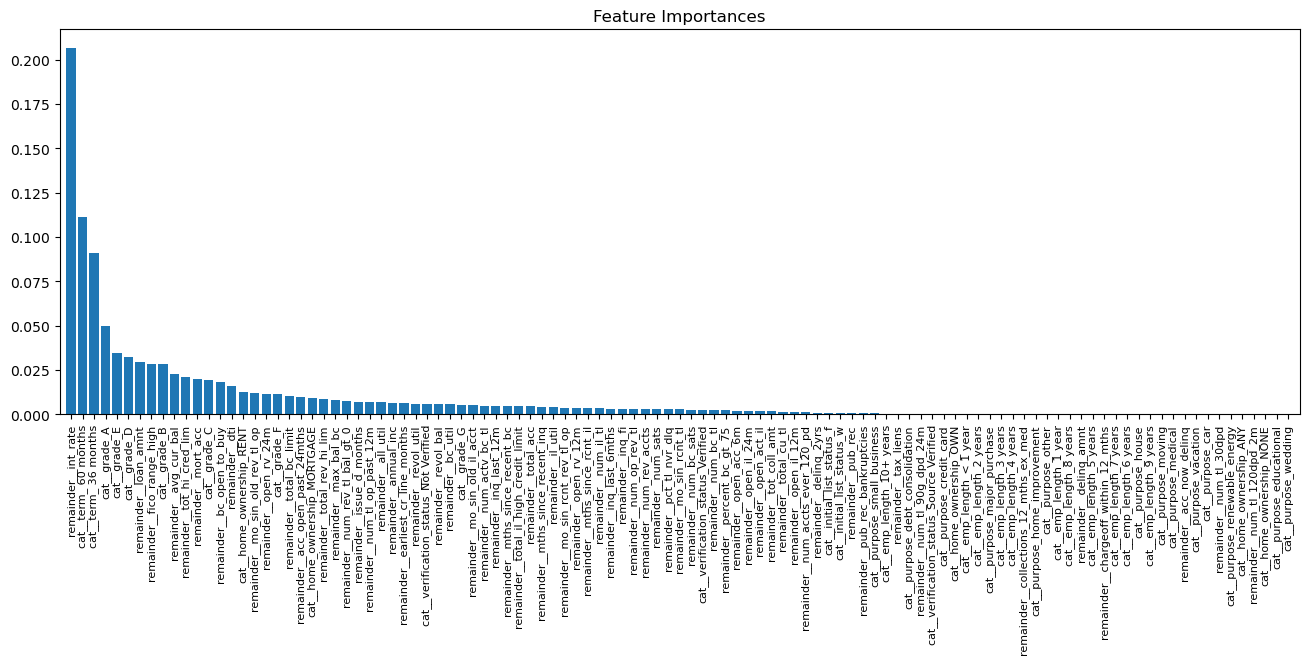

In [15]:
# Get feature importances
importances = rf.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

# Get feature names after preprocessing
feature_names = rf.named_steps['preprocessor'].get_feature_names_out()

plt.figure(figsize=(16, 5))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
# Make the x-labels human-readable
plt.xticks(range(len(importances)), feature_names[indices], rotation=90, fontsize=8)
plt.xlim([-1, len(importances)])
plt.show()

In [16]:
# print df_closed_temp columns after the pipeline
rf.named_steps['preprocessor'].get_feature_names_out()

array(['cat__term_ 36 months', 'cat__term_ 60 months', 'cat__grade_A',
       'cat__grade_B', 'cat__grade_C', 'cat__grade_D', 'cat__grade_E',
       'cat__grade_F', 'cat__grade_G', 'cat__emp_length_1 year',
       'cat__emp_length_10+ years', 'cat__emp_length_2 years',
       'cat__emp_length_3 years', 'cat__emp_length_4 years',
       'cat__emp_length_5 years', 'cat__emp_length_6 years',
       'cat__emp_length_7 years', 'cat__emp_length_8 years',
       'cat__emp_length_9 years', 'cat__emp_length_< 1 year',
       'cat__home_ownership_ANY', 'cat__home_ownership_MORTGAGE',
       'cat__home_ownership_NONE', 'cat__home_ownership_OWN',
       'cat__home_ownership_RENT',
       'cat__verification_status_Not Verified',
       'cat__verification_status_Source Verified',
       'cat__verification_status_Verified', 'cat__purpose_car',
       'cat__purpose_credit_card', 'cat__purpose_debt_consolidation',
       'cat__purpose_educational', 'cat__purpose_home_improvement',
       'cat__purpose_

Method 1 for feature selection: Using Sklearn, which is an automatic feature. 

I do not know how this works, so I will corroborate with another method below in Method 2

In [17]:
# Using selector method to select the best features
from sklearn.feature_selection import SelectFromModel

# use the selectfrommodel with the preprocessing pipeline and the classifier
selector = SelectFromModel(rf.named_steps['classifier'], prefit=True)

# Transform the dataset (keep only selected features)
X_train_selected = selector.transform(rf.named_steps['preprocessor'].transform(X_train))
X_test_selected = selector.transform(rf.named_steps['preprocessor'].transform(X_test))

# Get feature names after preprocessing
feature_names = rf.named_steps['preprocessor'].get_feature_names_out()

# Check selected feature names
selected_features = feature_names[selector.get_support()]
print("Selected Features:", selected_features)


c:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected Features: ['cat__term_ 36 months' 'cat__term_ 60 months' 'cat__grade_A'
 'cat__grade_B' 'cat__grade_C' 'cat__grade_D' 'cat__grade_E'
 'cat__grade_F' 'cat__home_ownership_RENT' 'remainder__loan_amnt'
 'remainder__int_rate' 'remainder__dti' 'remainder__fico_range_high'
 'remainder__open_rv_24m' 'remainder__acc_open_past_24mths'
 'remainder__avg_cur_bal' 'remainder__bc_open_to_buy'
 'remainder__mo_sin_old_rev_tl_op' 'remainder__mort_acc'
 'remainder__tot_hi_cred_lim' 'remainder__total_bc_limit']


c:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [18]:
len(selected_features)

21

In [19]:
# Get feature importance scores
feature_importances = selector.estimator.feature_importances_

# Create a DataFrame to view selection criteria
feature_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
feature_df = feature_df.sort_values(by="Importance", ascending=False)
feature_df.head(21)

,Feature,Importance
45,remainder__int_rate,0.206717
1,cat__term_ 60 months,0.111130
0,cat__term_ 36 months,0.091222
2,cat__grade_A,0.049929
6,cat__grade_E,0.034572
5,cat__grade_D,0.032231
44,remainder__loan_amnt,0.029542
49,remainder__fico_range_high,0.028596
3,cat__grade_B,0.028564
73,remainder__avg_cur_bal,0.022939


Method 2: From graph above, we calculate the mean importance and select features above the mean

In [20]:
# Get mean importance score (if threshold="mean")
mean_importance = feature_importances.mean()
print("Mean Feature Importance Score:", mean_importance)

# Compare each feature importance to the threshold
feature_df["Above Threshold"] = feature_df["Importance"] > mean_importance

# Sort by importance
feature_df = feature_df.sort_values(by="Importance", ascending=False)
feature_df.head(25)

Mean Feature Importance Score: 0.009345794392523367


,Feature,Importance,Above Threshold
45,remainder__int_rate,0.206717,True
1,cat__term_ 60 months,0.111130,True
0,cat__term_ 36 months,0.091222,True
2,cat__grade_A,0.049929,True
6,cat__grade_E,0.034572,True
5,cat__grade_D,0.032231,True
44,remainder__loan_amnt,0.029542,True
49,remainder__fico_range_high,0.028596,True
3,cat__grade_B,0.028564,True
73,remainder__avg_cur_bal,0.022939,True


From the above, we can confirm that both methods of feature selection have selected the same features. The function from Method 1 might have just chosen those above the mean importance, which aligns with my intuition of taking features above mean importances

We can now proceed to train the model with the selected features.

In [21]:
# Calculate the contribution of the first 21 features that are above the threshold we have verified:
top_features = feature_df[feature_df["Above Threshold"]].head(21)
contribution = top_features["Importance"].sum()
print("Contribution of Top 21 Features:", contribution)

Contribution of Top 21 Features: 0.7986512377109438


### 2.3 Select most relevant features into creating a new df: df_closed_new

In [22]:
# Extract the top features from top_features dataframe:
top_features_names = top_features["Feature"].tolist()
print("Top Features:", top_features_names)

len(top_features_names)

Top Features: ['remainder__int_rate', 'cat__term_ 60 months', 'cat__term_ 36 months', 'cat__grade_A', 'cat__grade_E', 'cat__grade_D', 'remainder__loan_amnt', 'remainder__fico_range_high', 'cat__grade_B', 'remainder__avg_cur_bal', 'remainder__tot_hi_cred_lim', 'remainder__mort_acc', 'cat__grade_C', 'remainder__bc_open_to_buy', 'remainder__dti', 'cat__home_ownership_RENT', 'remainder__mo_sin_old_rev_tl_op', 'remainder__open_rv_24m', 'cat__grade_F', 'remainder__total_bc_limit', 'remainder__acc_open_past_24mths']


21

In [23]:
# Step 1: Create a dictionary to map encoded feature names to original names
mapping_dict = {
    'remainder__int_rate': 'int_rate',                           # 1
    'cat__term_ 60 months': 'term',                              # 2
    'cat__term_ 36 months': 'term',
    'cat__grade_A': 'grade',                                     # 3
    'remainder__loan_amnt': 'loan_amnt',                         # 4
    'cat__grade_E': 'grade',
    'cat__grade_D': 'grade',
    'cat__grade_B': 'grade',
    'remainder__mort_acc': 'mort_acc',                           # 5
    'remainder__tot_hi_cred_lim': 'tot_hi_cred_lim',             # 6
    'remainder__fico_range_high': 'fico_range_high',             # 7
    'remainder__avg_cur_bal': 'avg_cur_bal',                     # 8
    'cat__grade_C': 'grade',
    'remainder__bc_open_to_buy': 'bc_open_to_buy',               # 9
    'remainder__dti': 'dti',                                     # 10
    'cat__grade_F': 'grade',                              
    'remainder__open_rv_24m': 'open_rv_24m',                     # 11
    'remainder__mo_sin_old_rev_tl_op': 'mo_sin_old_rev_tl_op',   # 12
    'cat__home_ownership_RENT': 'home_ownership',                # 13
    'remainder__acc_open_past_24mths': 'acc_open_past_24mths',   # 14
    'remainder__total_bc_limit': 'total_bc_limit'                # 15
}

# Step 2: Convert transformed names to original names
original_names = [mapping_dict.get(feature, feature) for feature in top_features_names]
print("Original Feature Names:", original_names)

len(original_names)


Original Feature Names: ['int_rate', 'term', 'term', 'grade', 'grade', 'grade', 'loan_amnt', 'fico_range_high', 'grade', 'avg_cur_bal', 'tot_hi_cred_lim', 'mort_acc', 'grade', 'bc_open_to_buy', 'dti', 'home_ownership', 'mo_sin_old_rev_tl_op', 'open_rv_24m', 'grade', 'total_bc_limit', 'acc_open_past_24mths']


21

In [24]:
# selected features to be used in df_closed are the unique values of the original names
selected_features = list(set(original_names))
selected_features

['total_bc_limit',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'fico_range_high',
 'tot_hi_cred_lim',
 'int_rate',
 'mort_acc',
 'home_ownership',
 'open_rv_24m',
 'term',
 'loan_amnt',
 'mo_sin_old_rev_tl_op',
 'grade',
 'dti',
 'bc_open_to_buy']

In [25]:
# save selected features into a pickle file
import pickle

with open("selected_features.pkl", "wb") as f:
    pickle.dump(selected_features, f)

In [26]:
# Create new df_closed with selected features
df_closed_new = df_closed[selected_features + ["loan_default"]]

df_closed_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553106 entries, 0 to 1553105
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   total_bc_limit        1553106 non-null  float64
 1   acc_open_past_24mths  1553106 non-null  float64
 2   avg_cur_bal           1553074 non-null  float64
 3   fico_range_high       1553106 non-null  float64
 4   tot_hi_cred_lim       1553106 non-null  float64
 5   int_rate              1553106 non-null  float64
 6   mort_acc              1553106 non-null  float64
 7   home_ownership        1553106 non-null  object 
 8   open_rv_24m           934630 non-null   float64
 9   term                  1553106 non-null  object 
 10  loan_amnt             1553106 non-null  float64
 11  mo_sin_old_rev_tl_op  1553106 non-null  float64
 12  grade                 1553106 non-null  object 
 13  dti                   1552205 non-null  float64
 14  bc_open_to_buy        1535397 non-

We notice above that from our selected features, we still have some missing values, although they are quite few of them.

For these missing values, we can impute them using the pipeline later

In [27]:
# check for missing values
df_closed_new.isna().sum()

total_bc_limit               0
acc_open_past_24mths         0
avg_cur_bal                 32
fico_range_high              0
tot_hi_cred_lim              0
int_rate                     0
mort_acc                     0
home_ownership               0
open_rv_24m             618476
term                         0
loan_amnt                    0
mo_sin_old_rev_tl_op         0
grade                        0
dti                        901
bc_open_to_buy           17709
loan_default                 0
dtype: int64

### 2.4 Training of Model with df_closed_new with focused features

In [28]:
X = df_closed_new.drop(columns=["loan_default"])
y = df_closed_new["loan_default"]

X

,total_bc_limit,acc_open_past_24mths,avg_cur_bal,fico_range_high,tot_hi_cred_lim,int_rate,mort_acc,home_ownership,open_rv_24m,term,loan_amnt,mo_sin_old_rev_tl_op,grade,dti,bc_open_to_buy
0,6350.0,13.0,596.0,669.0,16579.0,0.2499,0.0,RENT,13.0,36 months,3500.0,127.0,E,16.96,907.0
1,8500.0,3.0,14826.0,709.0,87102.0,0.0649,3.0,MORTGAGE,1.0,36 months,8000.0,35.0,A,10.84,5488.0
2,12700.0,4.0,6554.0,704.0,85580.0,0.0999,0.0,MORTGAGE,NaN,36 months,11000.0,183.0,B,18.38,4288.0
3,30000.0,4.0,4320.0,664.0,51390.0,0.1699,0.0,RENT,NaN,36 months,25000.0,170.0,D,10.50,10122.0
4,14600.0,9.0,9108.0,664.0,145285.0,0.1899,0.0,RENT,3.0,36 months,8800.0,48.0,D,18.24,2654.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553101,20000.0,7.0,1450.0,679.0,69552.0,0.1797,0.0,RENT,5.0,36 months,3000.0,136.0,D,30.03,13459.0
1553102,13800.0,4.0,18383.0,694.0,136927.0,0.1797,2.0,MORTGAGE,2.0,36 months,5000.0,92.0,D,10.51,13800.0
1553103,36500.0,9.0,1878.0,669.0,60124.0,0.1356,0.0,RENT,7.0,36 months,2500.0,212.0,C,18.24,34360.0
1553104,5900.0,6.0,8207.0,679.0,61666.0,0.1894,0.0,MORTGAGE,2.0,36 months,1000.0,290.0,D,15.49,1955.0


In [29]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553106 entries, 0 to 1553105
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   total_bc_limit        1553106 non-null  float64
 1   acc_open_past_24mths  1553106 non-null  float64
 2   avg_cur_bal           1553074 non-null  float64
 3   fico_range_high       1553106 non-null  float64
 4   tot_hi_cred_lim       1553106 non-null  float64
 5   int_rate              1553106 non-null  float64
 6   mort_acc              1553106 non-null  float64
 7   home_ownership        1553106 non-null  object 
 8   open_rv_24m           934630 non-null   float64
 9   term                  1553106 non-null  object 
 10  loan_amnt             1553106 non-null  float64
 11  mo_sin_old_rev_tl_op  1553106 non-null  float64
 12  grade                 1553106 non-null  object 
 13  dti                   1552205 non-null  float64
 14  bc_open_to_buy        1535397 non-

In [30]:
y

0          0
1          1
2          0
3          1
4          1
          ..
1553101    0
1553102    0
1553103    0
1553104    0
1553105    0
Name: loan_default, Length: 1553106, dtype: int64

In [31]:
y.value_counts(normalize=True)

loan_default
0    0.797814
1    0.202186
Name: proportion, dtype: float64

In [32]:
# Create the preprocessing pipeline for closed loans
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

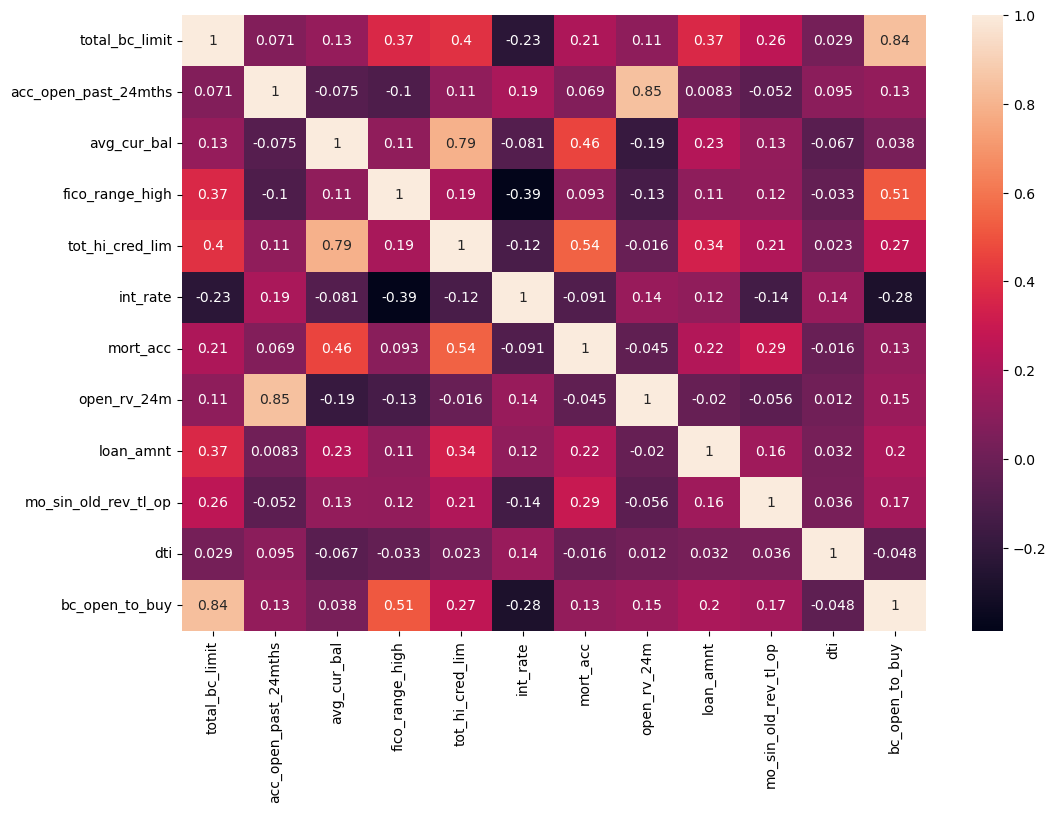

In [33]:
# correlation matrix of numerical columns

plt.figure(figsize=(12, 8))
sns.heatmap(X[num_cols].corr(), annot=True)
plt.show()

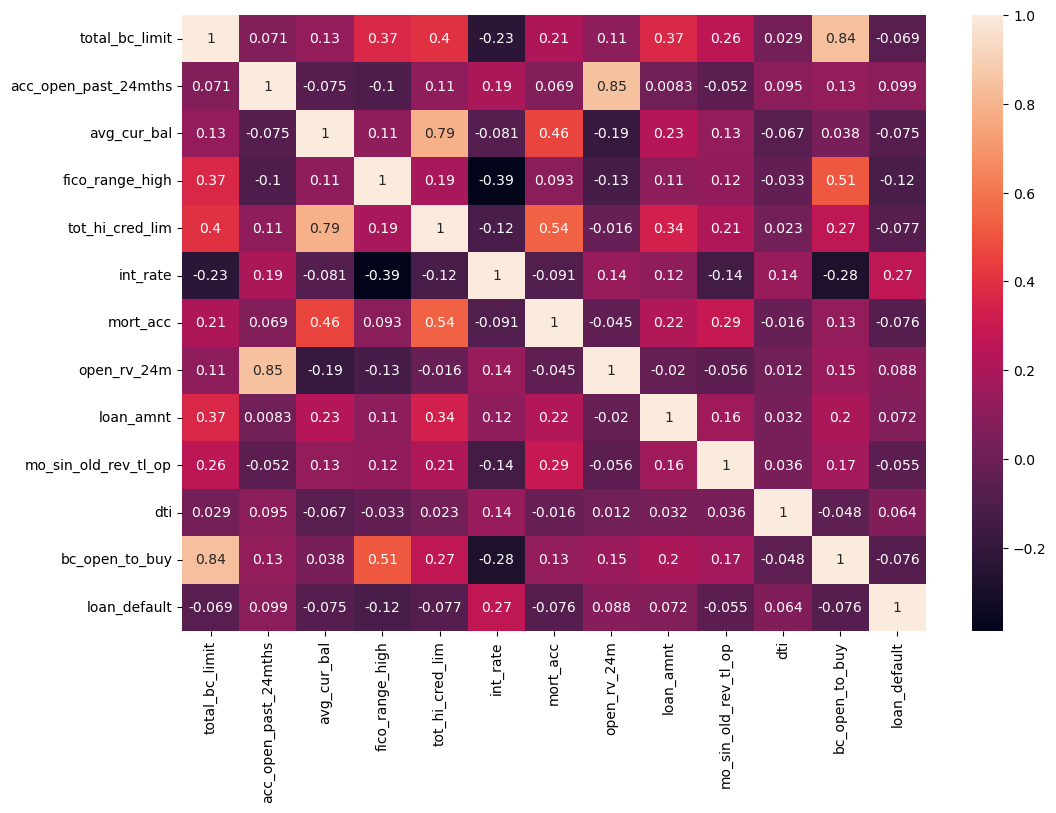

In [34]:
# correlation matrix of numerical columns with target variable
df_corr = pd.concat([X[num_cols], y], axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True)
plt.show()


### 2.5 Model Training and Selection

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553106 entries, 0 to 1553105
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   total_bc_limit        1553106 non-null  float64
 1   acc_open_past_24mths  1553106 non-null  float64
 2   avg_cur_bal           1553074 non-null  float64
 3   fico_range_high       1553106 non-null  float64
 4   tot_hi_cred_lim       1553106 non-null  float64
 5   int_rate              1553106 non-null  float64
 6   mort_acc              1553106 non-null  float64
 7   home_ownership        1553106 non-null  object 
 8   open_rv_24m           934630 non-null   float64
 9   term                  1553106 non-null  object 
 10  loan_amnt             1553106 non-null  float64
 11  mo_sin_old_rev_tl_op  1553106 non-null  float64
 12  grade                 1553106 non-null  object 
 13  dti                   1552205 non-null  float64
 14  bc_open_to_buy        1535397 non-

In [36]:
# check y counts
y.value_counts()

loan_default
0    1239089
1     314017
Name: count, dtype: int64

In [37]:
# Split the original (still imbalanced) data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,  # preserve class distribution
    random_state=42
)

In [38]:
# We'll do cross-validation with StratifiedKFold
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [39]:
# Compute ratio for XGBoost for later hyperparameter tuning
# scale_pos_weight = (#negatives / #positives)
num_neg = sum(y_train == 0)
num_pos = sum(y_train == 1)
scale_pos_weight_val = num_neg / float(num_pos)

Preprocessing

In [40]:
# for cat_cols, fill missing values with most frequent value and one-hot encode
cat_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# for num_cols, fill missing values with median and standardize
num_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_preprocessor, num_cols),
        ('cat', cat_preprocessor, cat_cols),
        ],
        remainder='passthrough'
    )



In [41]:
# Placeholder for the best model
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('scaler', StandardScaler()), # Standard Scaler() for logistic regression
                       ('classifier', LogisticRegression())
])

Instead of loading multiple models, I will do each of the 3 models separately so as not to make the processing time too long

In [42]:
# Model 1: Logistic Regression
param_grid_lr = {
    "classifier": [LogisticRegression(random_state=42, class_weight='balanced')], # for cost-sensitive learning which is useful for imbalanced datasets
    'classifier__C': loguniform(1e-4, 1e4) # C is the inverse of regularization strength
}

search_lr = RandomizedSearchCV(
    pipe, 
    param_distributions=param_grid_lr, 
    n_iter=10, 
    cv=cv, 
    n_jobs=-1, 
    verbose=1,
    random_state=42
    )

In [43]:
search_lr

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['total_bc_limit',
                                                                                'acc_open_past_24mths',
                                                                                'avg_cur_bal',
                                                                                'fico_range_high',
                                                                                'tot_hi_cred_lim',
                                                                                'int_rate',
                                                                                '...
                                                                                                              sparse_output=False))]),
                                                                               ['home_ownership',
                                                                                'term',
                                                                                'grade'])])),
                                             ('scaler', StandardScaler()),
                                             ('classifier',
                                              LogisticRegression())]),
                   n_jobs=-1,
                   param_distributions={'classifier': [LogisticRegression(class_weight='balanced',
                                                                          random_state=42)],
                                        'classifier__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000020600142990>},
                   random_state=42, verbose=1)

In [44]:
# fit model
search_lr.fit(X_train, y_train)

y_pred_lr = search_lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)
print(round(lr_acc, 3))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.642


In [45]:
# Model 2: Random Forest Classifier
param_grid_rf = {
    "classifier": [RandomForestClassifier(random_state=42, class_weight='balanced')], # for cost-sensitive learning which is useful for imbalanced datasets
    'classifier__n_estimators': [10, 50],
    'classifier__max_depth': [5, 10]
}

search_rf = RandomizedSearchCV(
    pipe, 
    param_distributions=param_grid_rf, 
    n_iter = 2,
    cv=cv, 
    n_jobs=-1, 
    verbose=1,
    random_state=42
    )

# fit model
search_rf.fit(X_train, y_train)

y_pred_rf = search_rf.predict(X_test)
rfc_acc = accuracy_score(y_test, y_pred_rf)
print(round(rfc_acc, 3))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
0.642


In [46]:
search_rf

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['total_bc_limit',
                                                                                'acc_open_past_24mths',
                                                                                'avg_cur_bal',
                                                                                'fico_range_high',
                                                                                'tot_hi_cred_lim',
                                                                                'int_rate',
                                                                                '...
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['home_ownership',
                                                                                'term',
                                                                                'grade'])])),
                                             ('scaler', StandardScaler()),
                                             ('classifier',
                                              LogisticRegression())]),
                   n_iter=2, n_jobs=-1,
                   param_distributions={'classifier': [RandomForestClassifier(class_weight='balanced',
                                                                              random_state=42)],
                                        'classifier__max_depth': [5, 10],
                                        'classifier__n_estimators': [10, 50]},
                   random_state=42, verbose=1)

In [47]:
# Model 3: XGBoost Classifier
param_grid_xgb = {
    "classifier": [
        XGBClassifier(
            random_state=42,
            scale_pos_weight=scale_pos_weight_val,  # cost-sensitive
            use_label_encoder=False,
            eval_metric="logloss"
        )
    ],
    "classifier__n_estimators": [50, 100],
    "classifier__max_depth": [5, 10]
}

search_xgb = RandomizedSearchCV(
    pipe, 
    param_distributions=param_grid_xgb, 
    n_iter = 4,
    cv=cv, 
    n_jobs=-1, 
    verbose=1,
    random_state=42
    )

# fit model
search_xgb.fit(X_train, y_train)

y_pred_xgb = search_xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
print(round(xgb_acc, 3))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\acer\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\Users\acer\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:03:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.665


In [48]:
search_xgb

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['total_bc_limit',
                                                                                'acc_open_past_24mths',
                                                                                'avg_cur_bal',
                                                                                'fico_range_high',
                                                                                'tot_hi_cred_lim',
                                                                                'int_rate',
                                                                                '...
                                                                     max_bin=None,
                                                                     max_cat_threshold=None,
                                                                     max_cat_to_onehot=None,
                                                                     max_delta_step=None,
                                                                     max_depth=None,
                                                                     max_leaves=None,
                                                                     min_child_weight=None,
                                                                     missing=nan,
                                                                     monotone_constraints=None,
                                                                     multi_strategy=None,
                                                                     n_estimators=None,
                                                                     n_jobs=None,
                                                                     num_parallel_tree=None,
                                                                     random_state=42, ...)],
                                        'classifier__max_depth': [5, 10],
                                        'classifier__n_estimators': [50, 100]},
                   random_state=42, verbose=1)

#### Selection of Best Model

Open pickle file of models_closed and model_metrics

In [49]:
# Define models (already trained and stored)
models = {
    "Logistic Regression": search_lr,
    "Random Forest": search_rf,
    "XGBoost": search_xgb
}

# Define evaluation metrics storage
model_metrics = {}

# Iterate over models and evaluate them
for model_name, model in models.items():
    # Get probability predictions (for models with predict_proba)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]  # Probability for positive class

    # Convert to binary predictions using 0.5 as default threshold (or use best threshold later)
    y_pred = (y_proba >= 0.5).astype(int)
    
    # Compute key evaluation metrics
    auc = roc_auc_score(y_test, y_proba) # this is proba, the rest are pred
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store metrics
    model_metrics[model_name] = {
        "AUC": auc,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "Predictions": y_pred,  # Store predictions for later use
        "Probabilities": y_proba  # Store probabilities in case needed
    }


In [50]:
# Display evaluation metrics
metrics_df = pd.DataFrame(model_metrics).T
metrics_df

,AUC,Accuracy,Precision,Recall,F1-score,Predictions,Probabilities
Logistic Regression,0.710634,0.642112,0.31758,0.670324,0.430976,"[0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, ...","[0.39081256537439457, 0.24316497352660477, 0.3..."
Random Forest,0.71212,0.642472,0.31806,0.67155,0.431671,"[0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, ...","[0.3915816683578603, 0.22017253738963738, 0.32..."
XGBoost,0.70652,0.665033,0.327385,0.622763,0.429161,"[0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, ...","[0.35671577, 0.09818755, 0.2186647, 0.2111853,..."


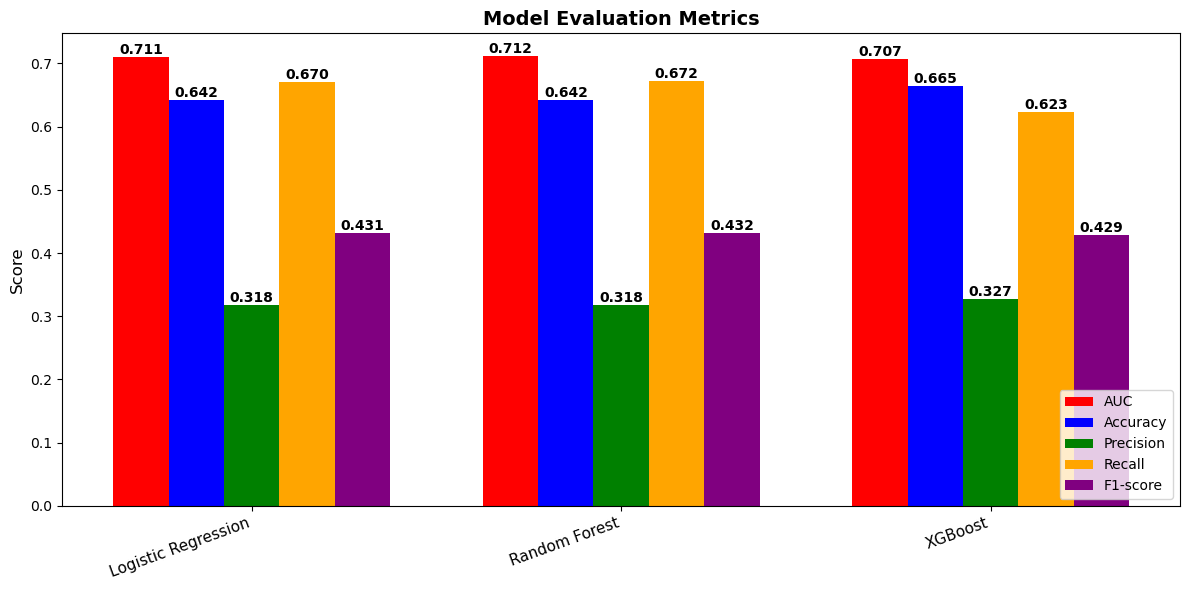

In [51]:
# Extract only numeric evaluation metrics (excluding predictions/probabilities)
metrics_to_plot = ["AUC", "Accuracy", "Precision", "Recall", "F1-score"]
metrics_df_numeric = metrics_df[metrics_to_plot]

# Define the positions and bar width
x = np.arange(len(metrics_df_numeric.index))  # X-axis labels (models)
bar_width = 0.15

# Define colors for each metric
colors = ["red", "blue", "green", "orange", "purple"]

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = []

for i, metric in enumerate(metrics_to_plot):
    bars.append(ax.bar(x + i * bar_width - 2 * bar_width, metrics_df_numeric[metric], width=bar_width, label=metric, color=colors[i]))

# Annotate bars with values
for bar_group in bars:
    for bar in bar_group:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(metrics_df_numeric.index, rotation=20, ha="right", fontsize=11)
ax.set_ylabel("Score", fontsize=12)
ax.set_title("Model Evaluation Metrics", fontsize=14, fontweight='bold')
ax.legend(fontsize=10, loc="lower right")

# Improve layout and display the plot
plt.tight_layout()
plt.show()

We want to minimize FNs in Closed Loans, where its predicted negative but actually default. 

Hence the metric we will use to evaluate is Recall:

In [52]:
# Select the best model based on the highest Recall score
best_model_name = max(model_metrics, key=lambda x: model_metrics[x]["Recall"])
best_model = models[best_model_name]
best_y_pred = model_metrics[best_model_name]["Predictions"]

print(f"\nBest Model: {best_model_name}")

#print model metrics separating each metric by a new line \n
print("\n".join([f"{k}: {v}" for k, v in model_metrics[best_model_name].items()]))


Best Model: Random Forest
AUC: 0.7121196764728194
Accuracy: 0.6424722009387616
Precision: 0.3180597870350819
Recall: 0.6715495828291191
F1-score: 0.4316711700646852
Predictions: [0 0 0 ... 0 0 1]
Probabilities: [0.39158167 0.22017254 0.32449673 ... 0.31733465 0.46212854 0.61645404]


In [53]:
# Random Forest best hyperparameters
best_model.best_params_

{'classifier__n_estimators': 50,
 'classifier__max_depth': 10,
 'classifier': RandomForestClassifier(class_weight='balanced', random_state=42)}

### 2.6 Model Collection of Results (Metrics)

In [54]:
# Define a function to plot ROC curve from confusion matrix
def plot_roc_curve(y_true, y_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    roc_auc_score_value = roc_auc_score(y_true, y_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for ' + model_name)
    plt.legend(loc="lower right")
    plt.show()

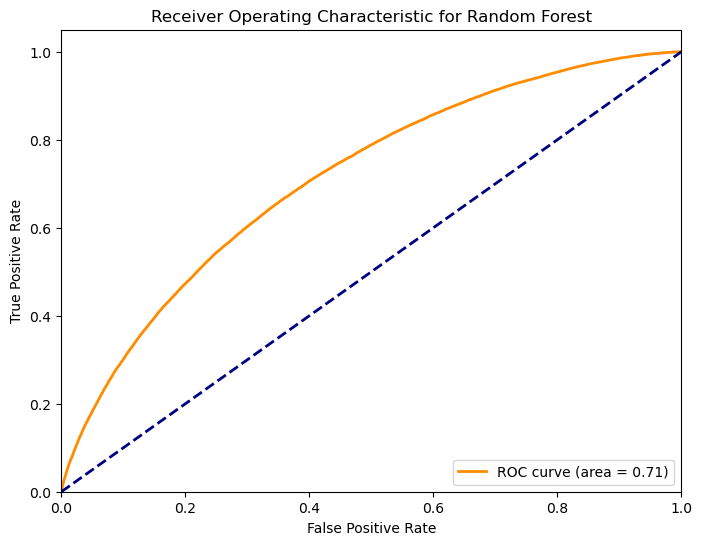

In [55]:
# plot ROC curve for the best model
plot_roc_curve(y_test, model_metrics[best_model_name]["Probabilities"], best_model_name)

In [56]:
def plot_conf_matrix(y_true, y_pred, model_name):
    """
    Plots a swapped confusion matrix so that:
      [ [TP, FN],
        [FP, TN] ]
    for clarity on actual churn vs. predicted churn.
    """
    cm = confusion_matrix(y_true, y_pred)
    cm = cm[[1, 0], :][:, [1, 0]]

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Default", "Not Default"],
                yticklabels=["Default", "Not Default"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix for " + model_name)
    plt.show()

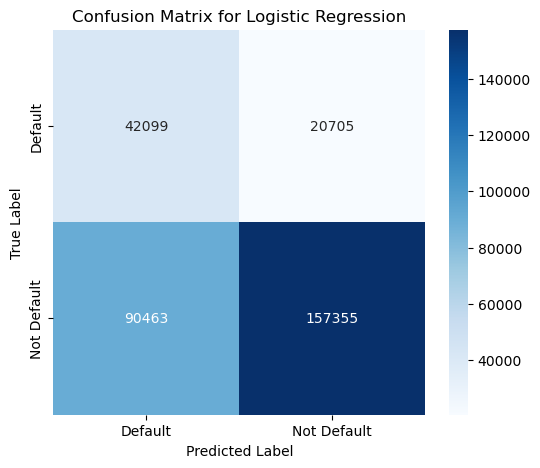

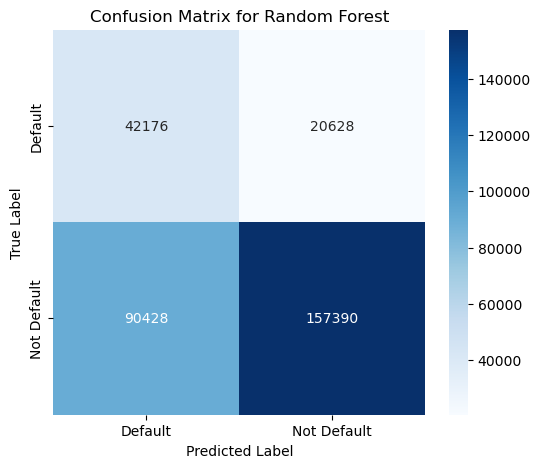

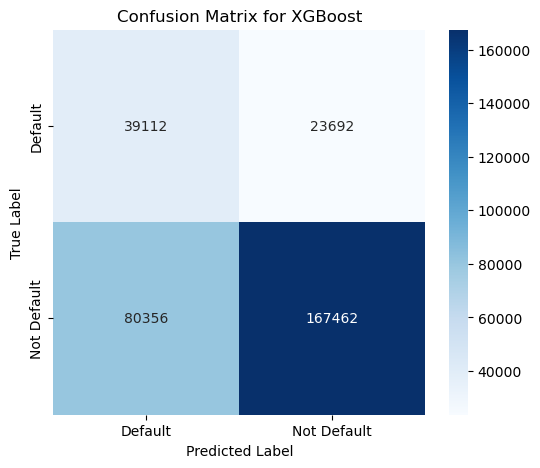

In [57]:
# Generate and interpret confusion matrix for all models
for model_name, model in models.items():
    plot_conf_matrix(y_test, model_metrics[model_name]["Predictions"], model_name)

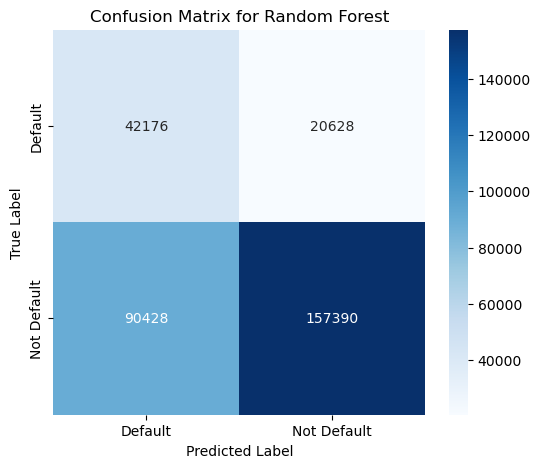

In [58]:
# Generate and interpret confusion matrix 
plot_conf_matrix(y_test, best_y_pred, best_model_name)


The best threshold here before applying cost-sensitive threshold tuning gives us around 20,380 which is a non-deterministic value

This threshold as of now is unknown, but we will determine a new one later when tuning the threshold to give us maximum risk adjusted returns (RAR)

In [59]:
# check the classification report for each model
for model_name, model in models.items():
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, model_metrics[model_name]["Predictions"]))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.63      0.74    247818
           1       0.32      0.67      0.43     62804

    accuracy                           0.64    310622
   macro avg       0.60      0.65      0.58    310622
weighted avg       0.77      0.64      0.68    310622


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.64      0.74    247818
           1       0.32      0.67      0.43     62804

    accuracy                           0.64    310622
   macro avg       0.60      0.65      0.59    310622
weighted avg       0.77      0.64      0.68    310622


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.88      0.68      0.76    247818
           1       0.33      0.62      0.43     62804

    accuracy                           0.67    310622
  

# 3. Model Implementation

### 3.1 Translating Confusion Matrix to financial impact at minimized FNs

Convert 'term' from categorical to numerical variable for multiplication purposes:

(We did not do in preprocessing to convert to numerical variable as we wanted the 2 values to be a binary representation in 1 variable)

In [60]:
# change 'term' to numerical values - remain as months
df_closed["term"] = df_closed["term"].str.replace(" months", "").astype(int)

In [61]:
# then divide term by 12 to get the number of years:
df_closed["term"] = df_closed["term"] / 12

In [62]:
# check the changes
df_closed["term"].value_counts()

term
3.0    1161859
5.0     391247
Name: count, dtype: int64

Define the confusion matrix that minimizes the FN-FP tradeoff:

In [63]:
def impact_test_set(y_true, y_pred, df):
    """
    Compute business impact focused on threshold tuning (balancing FN-FP trade-off).

    - FP (Loan fully paid but wrongly predicted as default) → Missed revenue (`total_rec_int`).
    - FN (Loan defaulted but wrongly predicted as fully paid) → Default loss (`loan_amnt - total_rec_prncp`).
    - RAR for threshold tuning = - (Missed Revenue + Default Loss)
    """

    df_temp = df.copy()
    df_temp["y_true"] = y_true
    df_temp["y_pred"] = y_pred

    #  False Positives (FP) - Good loan predicted as default (Missed Revenue)
    fp_loans = df_temp[(df_temp["y_pred"] == 1) & (df_temp["y_true"] == 0)]
    missed_interest = fp_loans["total_rec_int"].sum() if "total_rec_int" in fp_loans.columns else 0  

    #  False Negatives (FN) - Defaulted loan predicted as fully paid (Unexpected Loss)
    fn_loans = df_temp[(df_temp["y_pred"] == 0) & (df_temp["y_true"] == 1)]
    unrecovered_principal = (fn_loans["loan_amnt"] - fn_loans["total_rec_prncp"]).sum() if "loan_amnt" in fn_loans.columns and "total_rec_prncp" in fn_loans.columns else 0  

    #  Risk-Adjusted Return (RAR) - Penalizing FN & FP for best threshold tuning
    rar = missed_interest - unrecovered_principal

    return {
        "Missed Revenue (FP)": missed_interest,
        "Default Loss (FN)": unrecovered_principal,
        "Risk-Adjusted Return (RAR)": rar
    }


Computing financial impact for optimal FP-FN at threshold == 0.5.

In [64]:
# store all values in a dictionary
impact_dict = {}
for model_name, model in models.items():
    y_pred = model_metrics[model_name]["Predictions"]
    impact = impact_test_set(y_test, y_pred, df_closed.loc[X_test.index])
    impact_dict[model_name] = impact

# change the dictionary into a dataframe
impact_df = pd.DataFrame(impact_dict).T
impact_df

,Missed Revenue (FP),Default Loss (FN),Risk-Adjusted Return (RAR)
Logistic Regression,3.442442e+08,1.681735e+08,1.760706e+08
Random Forest,3.381292e+08,1.733546e+08,1.647746e+08
XGBoost,2.948363e+08,2.090316e+08,8.580469e+07


However, next, I find that it is not possible to do threshold tuning as the best threshold would be set at 0, classifying FNs to be 0 to achieve maximum returns. (See the PDF for What-If Analysis of Threshold)

It is not possible to achieve 0 FNs as this means the model is not even properly classifying anything anymore.

### 3.2 Computing estimated business impact on Closed Loans:

In [65]:
def impact_full_matrix(y_true, y_pred, df):
    """
    Compute full business impact from confusion matrix values.
    
    - True Positives (TP) → Defaulted loan correctly predicted as default.
      → Business Impact: Loss avoided (amount that would have been lost if funded).
      → Best Variable: `loan_amnt - total_rec_prncp` (unrecovered principal).

    - False Positives (FP) → Loan was fully paid, but wrongly predicted as default.
      → Business Impact: Missed opportunity (interest revenue lost).
      → Best Variable: `total_rec_int` (total interest lost from misclassification).

    - False Negatives (FN) → Loan defaulted but wrongly predicted as fully paid.
      → Business Impact: Default loss (unrecovered principal).
      → Best Variable: `loan_amnt - total_rec_prncp` (actual money lost).

    - True Negatives (TN) → Loan was fully paid and correctly predicted as fully paid.
      → Business Impact: Interest earned from good loans.
      → Best Variable: `total_rec_int` (actual total interest earned).

    - Risk-Adjusted Return (RAR) = (TN Gains) + (TP Avoided Loss) - (FP Missed Revenue) - (FN Default Loss)
    """

    df_temp = df.copy()
    df_temp["y_true"] = y_true
    df_temp["y_pred"] = y_pred

    # True Positives (TP) - Correctly predicted default (Loss Avoided)
    tp_loans = df_temp[(df_temp["y_pred"] == 1) & (df_temp["y_true"] == 1)]
    loss_avoided = (tp_loans["loan_amnt"] - tp_loans["total_rec_prncp"]).sum() if "loan_amnt" in tp_loans.columns and "total_rec_prncp" in tp_loans.columns else 0  

    # False Positives (FP) - Good loan wrongly predicted as default (Missed Revenue)
    fp_loans = df_temp[(df_temp["y_pred"] == 1) & (df_temp["y_true"] == 0)]
    missed_interest = fp_loans["total_rec_int"].sum() if "total_rec_int" in fp_loans.columns else 0  

    # False Negatives (FN) - Defaulted loan wrongly predicted as fully paid (Unexpected Loss)
    fn_loans = df_temp[(df_temp["y_pred"] == 0) & (df_temp["y_true"] == 1)]
    unrecovered_principal = (fn_loans["loan_amnt"] - fn_loans["total_rec_prncp"]).sum() if "loan_amnt" in fn_loans.columns and "total_rec_prncp" in fn_loans.columns else 0  

    # True Negatives (TN) - Good loan correctly predicted as fully paid (Interest Earned)
    tn_loans = df_temp[(df_temp["y_pred"] == 0) & (df_temp["y_true"] == 0)]
    earned_interest = tn_loans["total_rec_int"].sum() if "total_rec_int" in tn_loans.columns else 0  

    # Compute Risk-Adjusted Return (RAR)
    rar = earned_interest + loss_avoided - missed_interest - unrecovered_principal

    return {
        "Loss Avoided (TP)": loss_avoided,
        "Missed Revenue (FP)": missed_interest,
        "Default Loss (FN)": unrecovered_principal,
        "Interest Earned (TN)": earned_interest,
        "Risk-Adjusted Return (RAR)": rar
    }


In [66]:
# Initialize an empty list to store impact results for each model
impact_results = []

# Compute financial impact for all models using a loop
for model_name, model in models.items():
    y_pred = model_metrics[model_name]["Predictions"]
    impact = impact_full_matrix(y_test, y_pred, df_closed.loc[X_test.index])  # change back to impact_full_matrix
    
    # Append results as a dictionary
    impact["Model"] = model_name  # Add model name for reference
    impact_results.append(impact)

# Convert list of dictionaries into a DataFrame
df_impact_results = pd.DataFrame(impact_results)

# Reorder columns for readability
df_impact_results = df_impact_results[
    ["Model", "Loss Avoided (TP)", "Missed Revenue (FP)", "Default Loss (FN)", "Interest Earned (TN)", "Risk-Adjusted Return (RAR)"] # Add back ["Model", "Loss Avoided (TP)", "Missed Revenue (FP)", "Default Loss (FN)", "Interest Earned (TN)", "Risk-Adjusted Return (RAR)"]
]

# Display the DataFrame
df_impact_results

,Model,Loss Avoided (TP),Missed Revenue (FP),Default Loss (FN),Interest Earned (TN),Risk-Adjusted Return (RAR)
0,Logistic Regression,5.413887e+08,3.442442e+08,1.681735e+08,2.580494e+08,2.870204e+08
1,Random Forest,5.362077e+08,3.381292e+08,1.733546e+08,2.641644e+08,2.888883e+08
2,XGBoost,5.005306e+08,2.948363e+08,2.090316e+08,3.074573e+08,3.041202e+08


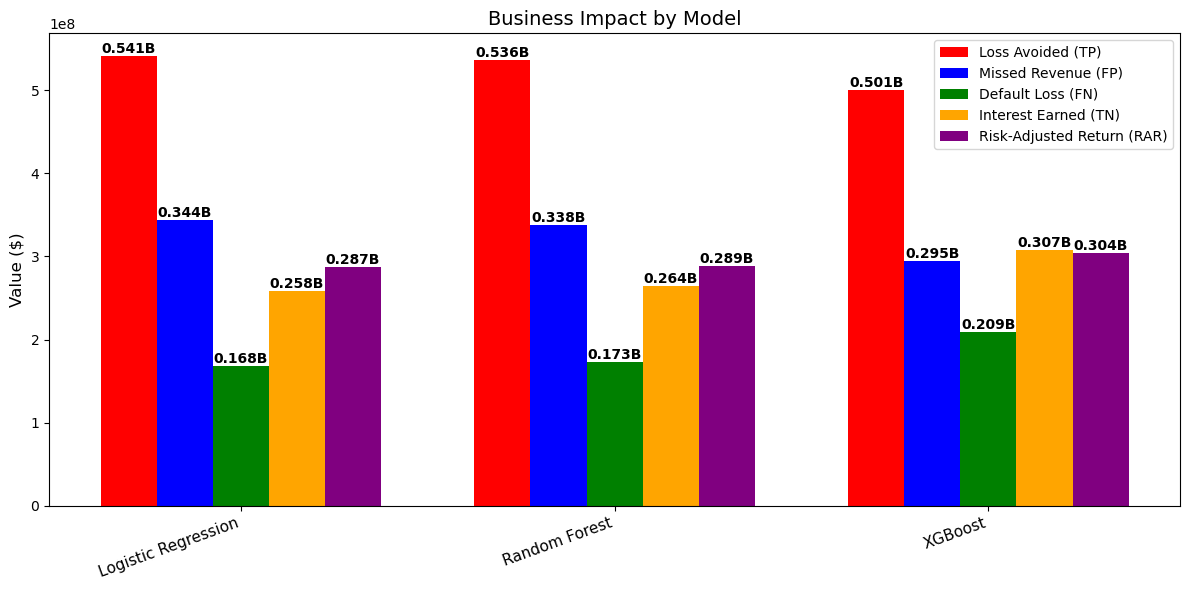

In [ ]:
## Plotting the Business Impact by Model before Threshold Tuning

# Set bar width for better spacing
bar_width = 0.15
x = np.arange(len(df_impact_results["Model"]))

# Define colors for better visualization
colors = ["red", "blue", "green", "orange", "purple"]

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = []
bars.append(ax.bar(x - 2 * bar_width, df_impact_results["Loss Avoided (TP)"], width=bar_width, label="Loss Avoided (TP)", color=colors[0]))
bars.append(ax.bar(x - bar_width, df_impact_results["Missed Revenue (FP)"], width=bar_width, label="Missed Revenue (FP)", color=colors[1]))
bars.append(ax.bar(x, df_impact_results["Default Loss (FN)"], width=bar_width, label="Default Loss (FN)", color=colors[2]))
bars.append(ax.bar(x + bar_width, df_impact_results["Interest Earned (TN)"], width=bar_width, label="Interest Earned (TN)", color=colors[3]))
bars.append(ax.bar(x + 2 * bar_width, df_impact_results["Risk-Adjusted Return (RAR)"], width=bar_width, label="Risk-Adjusted Return (RAR)", color=colors[4]))

# Annotate bars with values in billions (B)
for bar_group in bars:
    for bar in bar_group:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height / 1e9:.3f}B', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(df_impact_results["Model"], rotation=20, ha="right", fontsize=11)
ax.set_ylabel("Value ($)", fontsize=12)
ax.set_title("Business Impact by Model", fontsize=14)
ax.legend(fontsize=10, loc="upper right")

# Improve layout and display the plot
plt.tight_layout()
plt.show()

### 3.3 Determining Each Model's Best Threshold for Cost Sensitive Tuning

We want to maximise Risk-Adjusted Returns based on our mapping of confusion matrix above.

In [68]:
# 1) Function to compute confusion matrix counts (TN, FP, FN, TP) for any threshold
def get_confusion_counts(y_true, y_pred):
    """
    Returns a dictionary with TP, FP, FN, TN counts given y_true, y_pred.
    """
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return {"TP": tp, "FP": fp, "FN": fn, "TN": tn}


In [69]:
# 2) Threshold tuning function that tests thresholds on [0..1] and picks the best threshold by RAR
def tune_threshold_for_rar(model, X_test, y_test, df, step=0.01):
    thresholds = np.arange(0, 1 + step, step)
    best_threshold, best_rar, best_preds = 0, -np.inf, None
    
    # Probability of the positive class
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Track RAR across thresholds (to later plot)
    rar_values = []
    for t in thresholds:
        y_pred_t = (y_proba >= t).astype(int)
        impact = impact_full_matrix(y_test, y_pred_t, df.loc[X_test.index]) # change back to impact_full_matrix
        rar_values.append(impact["Risk-Adjusted Return (RAR)"])
        
        if impact["Risk-Adjusted Return (RAR)"] > best_rar:
            best_threshold = t
            best_rar = impact["Risk-Adjusted Return (RAR)"]
            best_preds = y_pred_t
    
    return best_threshold, best_rar, best_preds, thresholds, rar_values

In [70]:
# 3) Tune thresholds for each of the three models, store new confusion matrix/impacts
tuning_results = []      # will hold final results for display
threshold_curves = {}    # to store threshold vs RAR for plotting

for model_name, model in models.items():
    # Find best threshold by RAR
    best_t, best_rar, best_preds, all_thresholds, rar_values = tune_threshold_for_rar(
        model, X_test, y_test, df_closed, step=0.01
    )
    threshold_curves[model_name] = (all_thresholds, rar_values)
    
    # Compute new confusion counts at best threshold
    cm_counts = get_confusion_counts(y_test, best_preds)
    
    # Compute new business impact at best threshold
    impact_new = impact_full_matrix(y_test, best_preds, df_closed.loc[X_test.index]) # change back to impact_full_matrix
    
    # Collect results in a nice dictionary
    tuning_results.append({
        "Model": model_name,
        "Optimized Threshold": best_t,
        "TP": cm_counts["TP"],
        "FP": cm_counts["FP"],
        "FN": cm_counts["FN"],
        "TN": cm_counts["TN"],
        "Loss Avoided (TP)": impact_new["Loss Avoided (TP)"],
        "Missed Revenue (FP)": impact_new["Missed Revenue (FP)"],
        "Default Loss (FN)": impact_new["Default Loss (FN)"],
        "Interest Earned (TN)": impact_new["Interest Earned (TN)"],
        "Risk-Adjusted Return (RAR)": impact_new["Risk-Adjusted Return (RAR)"]
    })

In [71]:
# 4) Show new confusion matrix & RAR table
df_tuning_results = pd.DataFrame(tuning_results)
df_tuning_results = df_tuning_results[
    ["Model", "Optimized Threshold", "TP", "FP", "FN", "TN",
     "Loss Avoided (TP)", "Missed Revenue (FP)", "Default Loss (FN)",
     "Interest Earned (TN)", "Risk-Adjusted Return (RAR)"]
]
print("\n--- THRESHOLD-TUNED RESULTS ---")
df_tuning_results


--- THRESHOLD-TUNED RESULTS ---


,Model,Optimized Threshold,TP,FP,FN,TN,Loss Avoided (TP),Missed Revenue (FP),Default Loss (FN),Interest Earned (TN),Risk-Adjusted Return (RAR)
0,Logistic Regression,0.52,39620,80939,23184,166879,5.189541e+08,3.210839e+08,1.906081e+08,2.812097e+08,2.884719e+08
1,Random Forest,0.51,40857,85123,21947,162695,5.241114e+08,3.250475e+08,1.854508e+08,2.772461e+08,2.908592e+08
2,XGBoost,0.50,39112,80356,23692,167462,5.005306e+08,2.948363e+08,2.090316e+08,3.074573e+08,3.041202e+08


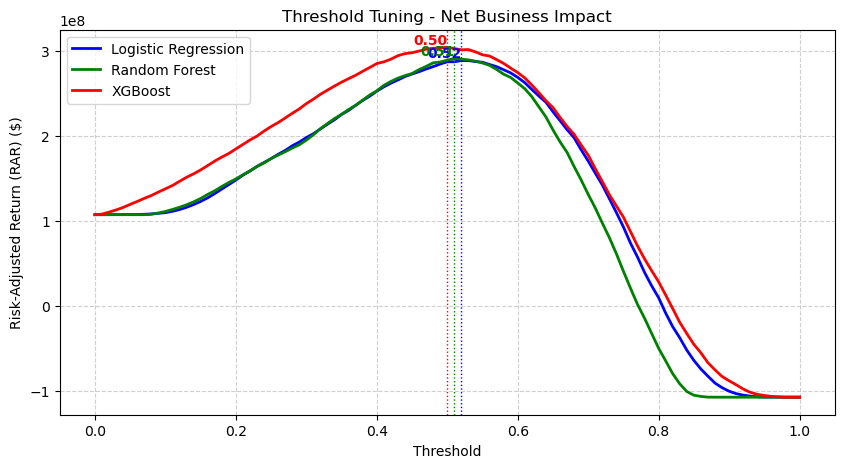

In [72]:
def plot_all_models_threshold_impact(threshold_curves, best_thresholds):
    """
    Plots the Risk-Adjusted Return (RAR) vs. Threshold for all models in a single plot.
    Marks the best threshold with a vertical dashed line for each model.
    """

    plt.figure(figsize=(10, 5))
    
    # Define colors for each model
    colors = {
        "Logistic Regression": "blue",
        "Random Forest": "green",
        "XGBoost": "red"
    }
    
    # Plot RAR curves for each model
    for model_name, (thresholds, rar_values) in threshold_curves.items():
        color = colors.get(model_name, "black")
        plt.plot(thresholds, rar_values, label=model_name, color=color, linewidth=2)
        
        # Identify the best threshold and maximum RAR for the model
        best_idx = np.argmax(rar_values)
        best_threshold = thresholds[best_idx]
        best_rar = rar_values[best_idx]

        # Add vertical dashed line at best threshold
        plt.axvline(x=best_threshold, color=color, linestyle="dotted", linewidth=1)
        
        # Annotate the best threshold:
        plt.text(best_threshold, best_rar, f"{best_threshold:.2f}", verticalalignment='bottom',
                 horizontalalignment='right', fontsize=10, color=color, fontweight="bold")

    # Labels and title
    plt.xlabel("Threshold")
    plt.ylabel("Risk-Adjusted Return (RAR) ($)")
    plt.title("Threshold Tuning - Net Business Impact")
    
    # Legend and grid
    plt.legend(loc="upper left")
    plt.grid(True, linestyle="--", alpha=0.6)
    
    # Show the plot
    plt.show()

# Extract best thresholds from tuning_results
best_thresholds = {result["Model"]: result["Optimized Threshold"] for result in tuning_results}

# Run the function
plot_all_models_threshold_impact(threshold_curves, best_thresholds)

In [73]:
def plot_conf_matrix_tuned(y_true, y_pred, model_name, threshold):
    """
    Plots a swapped confusion matrix so that:
      [ [TP, FN],
        [FP, TN] ]
    for clarity on actual churn vs. predicted churn.
    
    This version is adapted to show the impact of the **optimized threshold**.
    """
    cm = confusion_matrix(y_true, y_pred)
    cm = cm[[1, 0], :][:, [1, 0]]  # Swap rows & columns for better readability

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Default", "Not Default"],
                yticklabels=["Default", "Not Default"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Optimized Confusion Matrix for {model_name}\n(Threshold = {threshold:.2f})")
    plt.show()

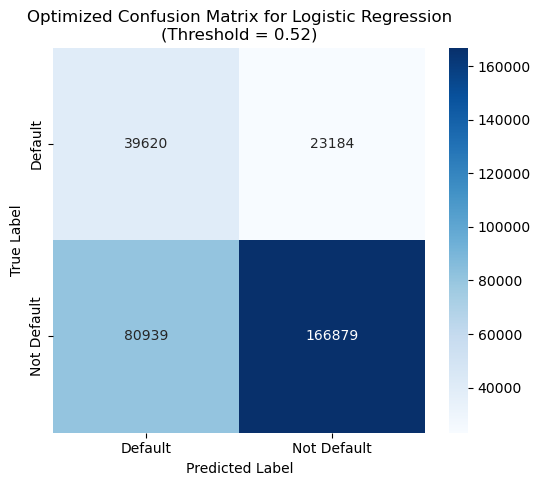

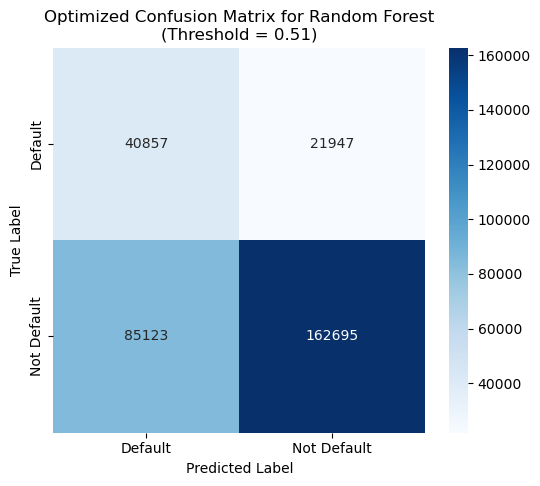

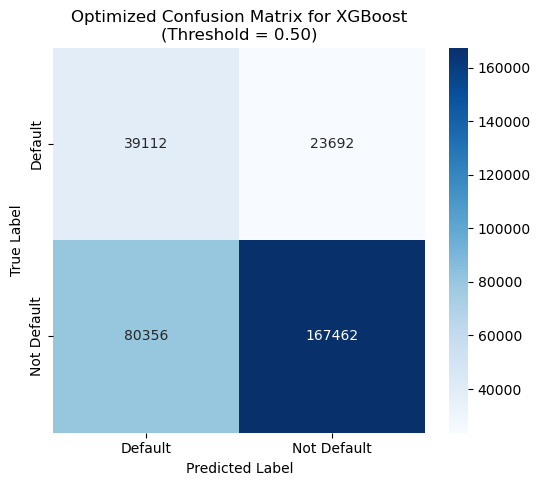

In [74]:
# Loop through each model and plot the confusion matrix at the optimized threshold
for row in tuning_results:
    model_nm = row["Model"]
    best_t = row["Optimized Threshold"]
    
    # Get best predictions at new threshold
    y_proba = models[model_nm].predict_proba(X_test)[:, 1]
    y_pred_best = (y_proba >= best_t).astype(int)
    
    # Plot the confusion matrix using the new function
    plot_conf_matrix_tuned(y_test, y_pred_best, model_nm, best_t)

In [75]:
df_tuning_results

,Model,Optimized Threshold,TP,FP,FN,TN,Loss Avoided (TP),Missed Revenue (FP),Default Loss (FN),Interest Earned (TN),Risk-Adjusted Return (RAR)
0,Logistic Regression,0.52,39620,80939,23184,166879,5.189541e+08,3.210839e+08,1.906081e+08,2.812097e+08,2.884719e+08
1,Random Forest,0.51,40857,85123,21947,162695,5.241114e+08,3.250475e+08,1.854508e+08,2.772461e+08,2.908592e+08
2,XGBoost,0.50,39112,80356,23692,167462,5.005306e+08,2.948363e+08,2.090316e+08,3.074573e+08,3.041202e+08


### 3.4 Conclusion of Best Model Returns and Threshold after Tuning

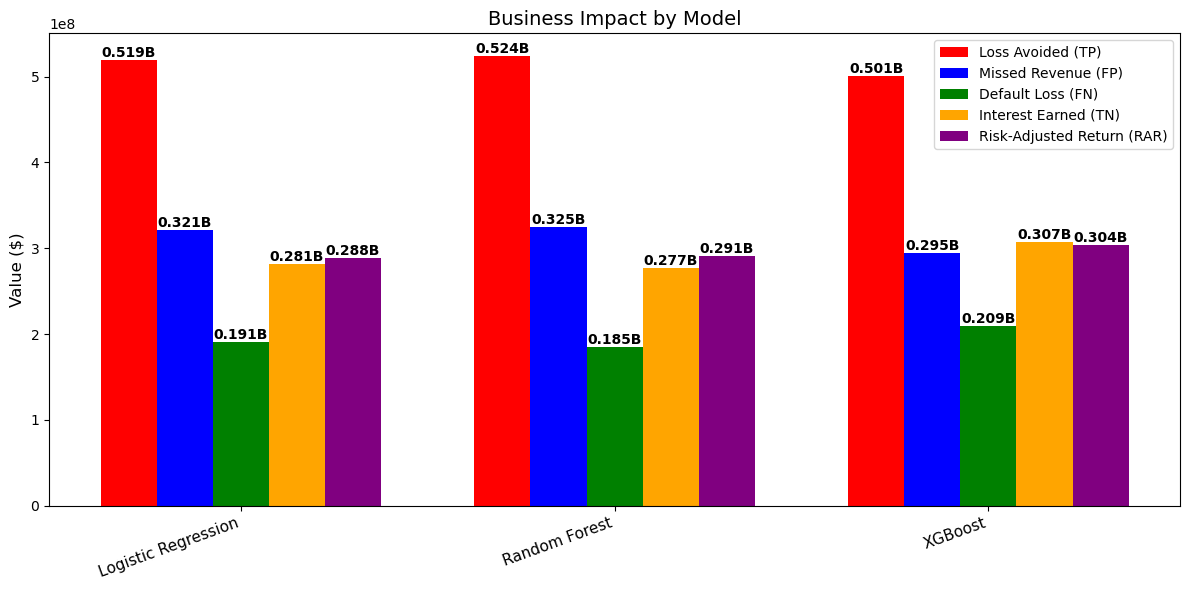

In [79]:
## Plotting the Business Impact by Model After Threshold Tuning

# Set bar width for better spacing
bar_width = 0.15
x = np.arange(len(df_tuning_results["Model"]))

# Define colors for better visualization
colors = ["red", "blue", "green", "orange", "purple"]

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = []
bars.append(ax.bar(x - 2 * bar_width, df_tuning_results["Loss Avoided (TP)"], width=bar_width, label="Loss Avoided (TP)", color=colors[0]))
bars.append(ax.bar(x - bar_width, df_tuning_results["Missed Revenue (FP)"], width=bar_width, label="Missed Revenue (FP)", color=colors[1]))
bars.append(ax.bar(x, df_tuning_results["Default Loss (FN)"], width=bar_width, label="Default Loss (FN)", color=colors[2]))
bars.append(ax.bar(x + bar_width, df_tuning_results["Interest Earned (TN)"], width=bar_width, label="Interest Earned (TN)", color=colors[3]))
bars.append(ax.bar(x + 2 * bar_width, df_tuning_results["Risk-Adjusted Return (RAR)"], width=bar_width, label="Risk-Adjusted Return (RAR)", color=colors[4]))

# Annotate bars with values in billions (B)
for bar_group in bars:
    for bar in bar_group:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height / 1e9:.3f}B', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(df_tuning_results["Model"], rotation=20, ha="right", fontsize=11)
ax.set_ylabel("Value ($)", fontsize=12)
ax.set_title("Business Impact by Model", fontsize=14)
ax.legend(fontsize=10, loc="upper right")

# Improve layout and display the plot
plt.tight_layout()
plt.show()

In [76]:
# best model and threshold from df_tuning_results
best_model_name_new = df_tuning_results.loc[df_tuning_results["Risk-Adjusted Return (RAR)"].idxmax(), "Model"]
best_threshold_new = df_tuning_results.loc[df_tuning_results["Risk-Adjusted Return (RAR)"].idxmax(), "Optimized Threshold"]

# Get best model and threshold
best_model_name_new, best_threshold_new

('XGBoost', 0.5)

Saving to pickle files:

1. best_thresholds_closed containing df_tuning_results
2. best_model_name containing best_model_name_new
3. best_threshold containing best_thresholds

In [77]:
# load into pkl best_model_name and model_metrics for closed loans

with open("best_model_name.pkl", "wb") as f:
    pickle.dump(best_model_name_new, f)

with open("best_threshold_new.pkl", "wb") as f:
    pickle.dump(best_threshold_new, f)

with open("df_tuning_results.pkl", "wb") as f:
    pickle.dump(df_tuning_results, f)

with open("models_closed.pkl", "wb") as f:
    pickle.dump(models, f)

with open("model_metrics_closed.pkl", "wb") as f:
    pickle.dump(model_metrics, f)

In [78]:
with open("model_metrics_closed.pkl", "wb") as f:
    pickle.dump(model_metrics, f)